# Simple fits

Here we are fitting a line from scratch.
In the next notebook, we will do fancier fits with neural networks, but let's start with a basic problem and complicate it as we go along.


In [1]:
from typing import Tuple

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


We start by generating some fake dataset, which is simple enough that we can visualize the results easily. For this reason, the dataset will contain only two  variables.

The simulated example data will be $f(x) = 3 x + \epsilon$, where $\epsilon \sim \mathcal{N}(\mu=0, \sigma=0.5)$.


In [2]:
def generate_data(N: int) -> np.ndarray:
    x = 2*np.random.randn(N, 1)
    epsilon = 0.5*np.random.randn(N, 1)
    z = 3*x + epsilon
    return np.concatenate((x, z), axis=1).astype(np.float32)

data = generate_data(N=1000)

We can fit this line from scratch, assuming $y = f(x) = \beta x + \alpha + \epsilon$, where $\epsilon$ is a zero-mean Gaussian noise.

We can do this in two ways. In both cases, we start assuming the knowledge of $f(x)$ and use the Bayes Theorem:

$ p(\alpha, \beta|\mathcal{D}) \, \propto p(\mathcal{D}|\alpha, \beta) \, p(\alpha) \, p(\beta)$

We assume $p(\alpha)$ and $p(\beta)$ are constants, so we just need to maximize the likelihood $p(\mathcal{D}|\alpha, \beta)$.
That likelihood is a Gaussian distribution, because we assumed $y$ is exactly equals to a line plus some Gaussian noise coming from $\epsilon$.

$p(\alpha,\beta|\mathcal{D}) \propto \prod \mathcal{N}(y_i|\text{mean}=f(x_i), \text{std. dev.}=\sigma_\epsilon)$

This leads to minimizing $L = \sum_i (y_i - \beta x_i - \alpha)^2$, as seen in the lecture (simply take $- \log p$ and to maximize $p$, one has to minimize $-\log p$).

We can try finding out $\beta$ and $\alpha$ by taking the derivative of $L$ and setting it to zero:

$\frac{d L}{d\beta} = 2 \sum_i (y_i - \beta x_i - \alpha) x_i = 0$

$\frac{d L}{d\alpha} = -2 \sum_i (y_i - \beta x_i - \alpha) = 0$

Re-arranging:

$2 \sum_i (y_i x_i - \beta x_i^2 - \alpha x_i) = 0$

$2 \sum_i (y_i - \beta x_i - \alpha) = 0$

This leads to:

$ \beta \sum_i x_i^2 = \sum_i (y_i - \alpha) x_i$

$ \alpha = 1/N \sum_i y_i - \beta x_i = \mathbb{E}[y - \beta x]$

We can then substitute $\alpha$ in $\beta$:

$ \beta \sum_i x_i^2 = \sum_i y_i x_i - 1/N \sum_i \sum_j (y_j - \beta x_j) x_i$

And expand it:

$ \beta (\sum_i x_i^2 - 1/N \sum_i \sum_j x_i x_j) = \sum_i y_i x_i - 1/N \sum_i \sum_j y_j x_i$

Taking $x_j$ from a sum that does not depend on $j$, we see that the second term is just the square of the sum over $x_i$:

$ \beta (\sum_i x_i^2 - 1/N(\sum_{i} x_i)^2 ) = \sum_i y_i x_i - 1/N \sum_i \sum_j y_j x_i$

Dividing by the number of points $N$, several sums reduce to averages, which make this much easier to interpret if we use some standard identities from statistics.
For example $1/N \sum_i x_i^2 - 1/N^2 (\sum_i x_i)^2$ is a known expression for the variance of $X$. 

$ \beta \text{var}[X] = \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y]$

And the right-hand-side is a known expression for the covariance between $X$ and $Y$:

$ \beta \text{var}[X] = \text{cov}[X,Y]$

This leads to:

$\beta = \frac{\text{cov}[X,Y]}{\text{var}[X]}$

This, together with the expression from above for $\alpha$, allows us to easily fit a line in a few lines of code:

In [3]:
cov = np.cov(data[:,0], data[:,1])[0,1]
varX = np.std(data[:,0])**2
beta = cov/varX
alpha = np.mean(data[:,1] - beta*data[:,0])

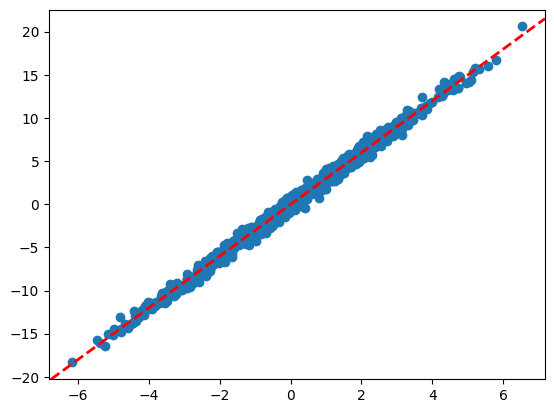

In [4]:
plt.scatter(data[:,0], data[:,1])
plt.axline((0, alpha), slope=beta, c='r', lw=2, ls='--', label="Line fit")